 We are going to develop a machine learning model to predict 
the total dollar amount that customers are willing to pay while purchasing a car given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Car_Purchasing_Data.csv')

### 1. Display Top 5 Rows of The Dataset

In [5]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


### 2. Check Last 5 Rows of The Dataset

In [6]:
data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(500, 9)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 500
Number of Columns 9


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


### 5. Check Null Values In The Dataset

In [10]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [11]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867488,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### 7. Visualization

In [12]:
import seaborn as sns

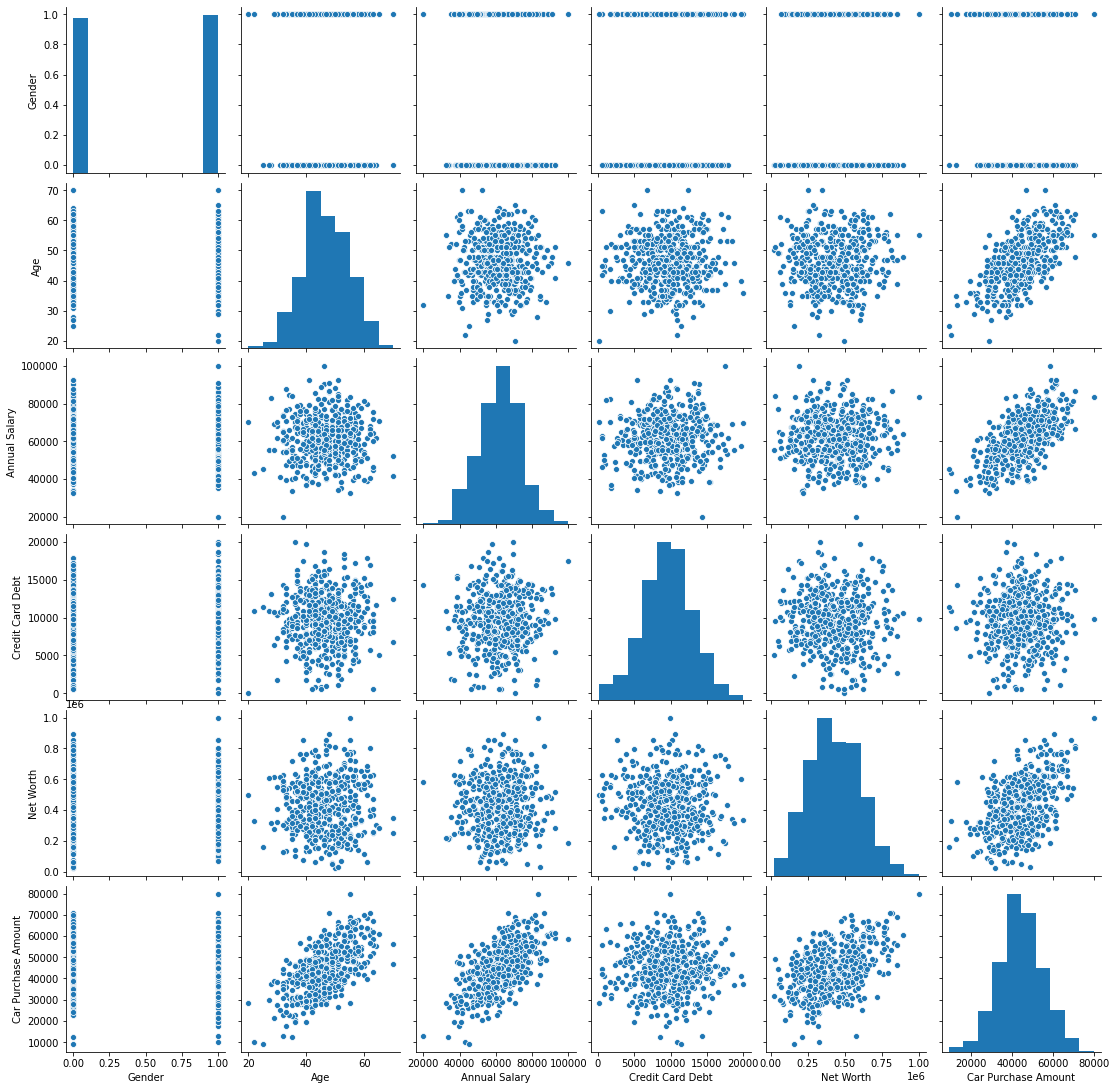

In [13]:
sns.pairplot(data)

### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [14]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [15]:
X = data.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [16]:
y = data['Car Purchase Amount']

In [17]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

### 9. Feature Scaling (Normalization)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [20]:
X_scaled

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.42      , 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46      , 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.68      , 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78      , 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.54      , 0.51713347, 0.46690159, 0.45198622]])

In [21]:
sc1 = MinMaxScaler()

In [22]:
y_reshape= y.values.reshape(-1,1)

In [23]:
y_scaled = sc1.fit_transform(y_reshape)

In [24]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

### 10. Splitting The Dataset Into The Training Set And Test Set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.20,random_state=42)

### 11. Import The models

In [27]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### 12. Model Training

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)


gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### ANN

![title](ANN_car.png)

### 13. Building The ANN

In [30]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 13.1 Initialize The ANN

In [31]:
ann = Sequential()

### 13.2 Adding input layer and first hidden layer

In [32]:
ann.add(Dense(25,input_dim=5,activation='relu'))

### 13.3 Adding Second hidden layer

In [33]:
ann.add(Dense(25,activation='relu'))

### 13.4 Adding the output layer

In [34]:
ann.add(Dense(1,activation='linear'))

### 13.5 Training The ANN

In [35]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [36]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [37]:
ann.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)


Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 0s 813us/step - loss: 0.1226 - val_loss: 0.0574
Epoch 2/100
320/320 [==============================] - 0s 63us/step - loss: 0.0415 - val_loss: 0.0169
Epoch 3/100
320/320 [==============================] - 0s 97us/step - loss: 0.0158 - val_loss: 0.0234
Epoch 4/100
320/320 [==============================] - 0s 106us/step - loss: 0.0191 - val_loss: 0.0246
Epoch 5/100
320/320 [==============================] - 0s 100us/step - loss: 0.0154 - val_loss: 0.0133
Epoch 6/100
320/320 [==============================] - 0s 72us/step - loss: 0.0106 - val_loss: 0.0093
Epoch 7/100
320/320 [==============================] - 0s 91us/step - loss: 0.0094 - val_loss: 0.0084
Epoch 8/100
320/320 [==============================] - 0s 81us/step - loss: 0.0079 - val_loss: 0.0085
Epoch 9/100
320/320 [==============================] - 0s 97us/step - loss: 0.0070 - val_loss: 0.0079
Epoch 10/100
320/320 [===========

### 14. Prediction on Test Data

In [38]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)
y_pred6 = ann.predict(X_test)

### 15. Evaluating the Algorithm

In [39]:
from sklearn import metrics

In [40]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)

In [41]:
print(score1,score2,score3,score4,score5,score6)

0.9994234310992762 0.9547066777872099 0.9535675486435091 0.9744025716695657 0.9497563859782069 0.997357966334302


In [42]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GBR','XG','ANN'],
              'R2_SCORE':[score1,score2,score3,score4,score5,score6]})

In [43]:
final_data

,Models,R2_SCORE
0,LR,0.999423
1,SVR,0.954707
2,RF,0.953568
3,GBR,0.974403
4,XG,0.949756
5,ANN,0.997358


In [44]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

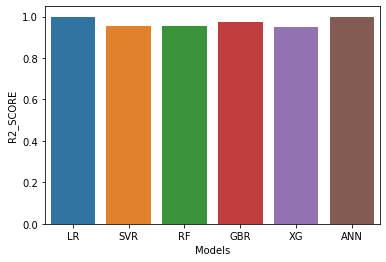

In [45]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

### 16. Save The Model

In [46]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [47]:
ann = Sequential()

In [48]:
ann.add(Dense(25,input_dim=5,activation='relu'))
ann.add(Dense(25,activation='relu'))
ann.add(Dense(1,activation='linear'))

In [49]:
ann.compile(optimizer='adam',loss='mean_squared_error')
ann.fit(X_scaled,y_scaled,epochs=100,batch_size=50,verbose=1)

Epoch 1/100
500/500 [==============================] - 0s 432us/step - loss: 0.3559
Epoch 2/100
500/500 [==============================] - 0s 58us/step - loss: 0.1572
Epoch 3/100
500/500 [==============================] - 0s 82us/step - loss: 0.0555
Epoch 4/100
500/500 [==============================] - 0s 74us/step - loss: 0.0172
Epoch 5/100
500/500 [==============================] - 0s 62us/step - loss: 0.0159
Epoch 6/100
500/500 [==============================] - 0s 74us/step - loss: 0.0136
Epoch 7/100
500/500 [==============================] - 0s 70us/step - loss: 0.0113
Epoch 8/100
500/500 [==============================] - 0s 72us/step - loss: 0.0108
Epoch 9/100
500/500 [==============================] - 0s 58us/step - loss: 0.0101
Epoch 10/100
500/500 [==============================] - 0s 70us/step - loss: 0.0095
Epoch 11/100
500/500 [==============================] - 0s 66us/step - loss: 0.0090
Epoch 12/100
500/500 [==============================] - 0s 62us/step - loss: 0.0085


In [50]:
import joblib

In [51]:
joblib.dump(ann,'car_model')

['car_model']

In [52]:
model = joblib.load('car_model')

### 17. Prediction on New Data

In [59]:
import numpy as np

In [60]:
data.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.38091,238961.2505,35321.45877


In [61]:
X_test1=sc.transform(np.array([[0,42,62812.09301,11609.38091,238961.2505]]))

In [62]:
X_test1

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985]])

In [63]:
pred = ann.predict(X_test1)

In [65]:
sc1.inverse_transform(pred)

array([[35533.664]], dtype=float32)

In [ ]:
35321.45877

### 18. GUI

In [71]:
import numpy as np
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [72]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    
    model = joblib.load('car_model')
    result=model.predict(sc.transform(np.array([[p1,p2,p3,p4,p5]])))
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=sc1.inverse_transform(result)).grid(row=10)
    print("Car Purchase amount", sc1.inverse_transform(result)[0][0])
    
master = Tk()
master.title("Car Purchase Amount Predictions Using Machine Learning")


label = Label(master, text = "Car Purchase Amount Predictions Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Gender").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Annual Salary").grid(row=3)
Label(master, text="Credit Card Debt").grid(row=4)
Label(master, text="Net Worth").grid(row=5)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Car Purchase amount 35533.664


### 19. ANN Visualizer

In [ ]:
# pip3 install ann_visualizer
# pip install graphviz

In [73]:
from ann_visualizer.visualize import ann_viz;

In [75]:
ann_viz(ann,title="ANN")